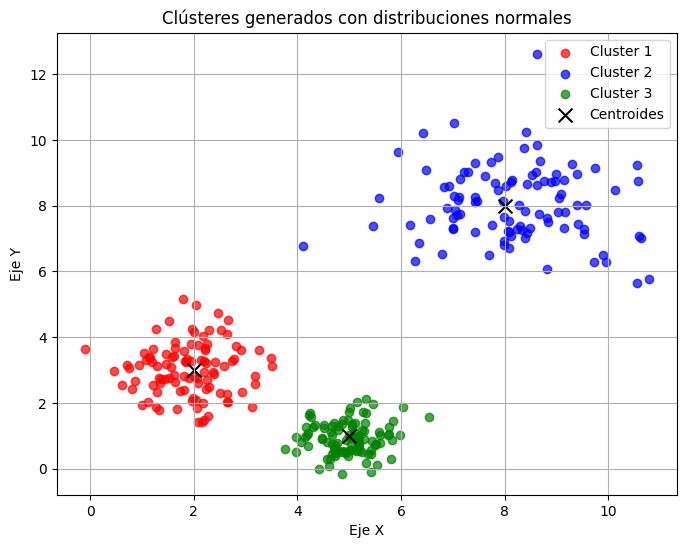

In [2]:
import numpy as np
import matplotlib.pyplot as plt
 
# Definición de parámetros para los tres clústeres
# Posiciones de los centroides (pueden ser modificados)
centroids = [
    [2, 3],  # Centroide del primer clúster
    [8, 8],  # Centroide del segundo clúster
    [5, 1]   # Centroide del tercer clúster
]
 
# Desviaciones estándar (dispersión de los puntos, pueden ser modificadas)
std_devs = [0.8, 1.2, 0.5]
 
# Número de puntos en cada clúster
n_points_per_cluster = 100
 
# Generar los datos
np.random.seed(42)  # Para reproducibilidad
cluster_1 = np.random.normal(loc=centroids[0], scale=std_devs[0], size=(n_points_per_cluster, 2))
cluster_2 = np.random.normal(loc=centroids[1], scale=std_devs[1], size=(n_points_per_cluster, 2))
cluster_3 = np.random.normal(loc=centroids[2], scale=std_devs[2], size=(n_points_per_cluster, 2))
  
# Visualización de los datos
plt.figure(figsize=(8, 6))
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], color="red", label="Cluster 1", alpha=0.7)
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], color="blue", label="Cluster 2", alpha=0.7)
plt.scatter(cluster_3[:, 0], cluster_3[:, 1], color="green", label="Cluster 3", alpha=0.7)
 
# Dibujar centroides
plt.scatter(*zip(*centroids), color="black", marker="x", s=100, label="Centroides")
plt.title("Clústeres generados con distribuciones normales")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.legend()
plt.grid(True)
plt.show()